In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('question6a.csv')
df = df[['event_narrative', 'event_type']]
# Your list of classes
classes = ['Thunderstorm Wind', 'Heavy Rain', 'Hail', 'Excessive Heat', 'Lightning', 'Winter Storm', 'Tornado', 'Strong Wind', 'Wildfire', 'Heavy Snow', 'Winter Weather', 'Flood', 'Coastal Flood', 'Lake-Effect Snow', 'High Wind', 'Ice Storm', 'Flash Flood', 'Dust Storm', 'Waterspout', 'Marine Thunderstorm Wind', 'Extreme Cold/Wind Chill', 'Dense Fog', 'Cold/Wind Chill', 'Blizzard', 'Frost/Freeze', 'Funnel Cloud', 'Rip Current', 'Avalanche', 'Marine High Wind', 'High Surf', 'Debris Flow', 'Astronomical Low Tide', 'Marine Dense Fog', 'Heat', 'Drought', 'Marine Hail', 'Dust Devil', 'Tropical Storm', 'Storm Surge/Tide', 'Freezing Fog', 'Marine Strong Wind', 'Sneakerwave', 'Marine Tropical Depression', 'Hurricane', 'Marine Tropical Storm', 'Marine Hurricane/Typhoon', 'Seiche', 'Lakeshore Flood']

# Define merged classes based on similarity
merged_classes = {
    'Severe Weather': ['Thunderstorm Wind', 'Hail', 'Tornado', 'Strong Wind', 'Wildfire', 'Lightning', 'Winter Storm', 'Heavy Rain', 'Winter Weather', 'Flash Flood', 'Dust Storm', 'Waterspout', 'Marine Thunderstorm Wind', 'Blizzard', 'Frost/Freeze', 'Funnel Cloud', 'Avalanche', 'Marine High Wind', 'Dust Devil', 'Tropical Storm', 'Hurricane', 'Marine Tropical Storm', 'Marine Hurricane/Typhoon'],
    'Extreme Conditions': ['Excessive Heat', 'Extreme Cold/Wind Chill', 'Cold/Wind Chill', 'Heat', 'Freezing Fog', 'Drought'],
    'Floods and Water-related': ['Flood', 'Coastal Flood', 'Lake-Effect Snow', 'High Wind', 'Ice Storm', 'Astronomical Low Tide', 'Marine Dense Fog', 'Rip Current', 'Debris Flow', 'Storm Surge/Tide', 'Sneakerwave', 'Seiche', 'Lakeshore Flood'],
    'Other': ['Dense Fog', 'Marine Hail', 'Marine Strong Wind', 'Marine Tropical Depression', 'High Surf'],
}

# Create a mapping of original classes to merged classes
class_to_merged = {}
for merged_class, sub_classes in merged_classes.items():
    for sub_class in sub_classes:
        class_to_merged[sub_class] = merged_class

# Create a new column 'merged_event_type' in the DataFrame
df['merged_event_type'] = df['event_type'].map(class_to_merged)
df = df.dropna()

In [4]:
df

,event_narrative,event_type,merged_event_type
0,Large tree down between Plantersville and Nett...,Thunderstorm Wind,Severe Weather
1,One to two feet of deep standing water develop...,Heavy Rain,Severe Weather
2,NWS Columbia relayed a report of trees blown d...,Thunderstorm Wind,Severe Weather
3,Media reported two trees blown down along I-40...,Thunderstorm Wind,Severe Weather
5,A few tree limbs greater than 6 inches down on...,Thunderstorm Wind,Severe Weather
...,...,...,...
36170,Two trees were knocked down in the Oakville di...,Thunderstorm Wind,Severe Weather
36171,Trees were reported down on Long Pond Road in ...,Thunderstorm Wind,Severe Weather
36172,Multiple trees and wires were reported down in...,Thunderstorm Wind,Severe Weather
36173,A telephone pole and wires were downed on Bell...,Thunderstorm Wind,Severe Weather


Class=3, n=23220 (84.556%)
Class=0, n=727 (2.647%)
Class=1, n=3180 (11.580%)
Class=2, n=334 (1.216%)


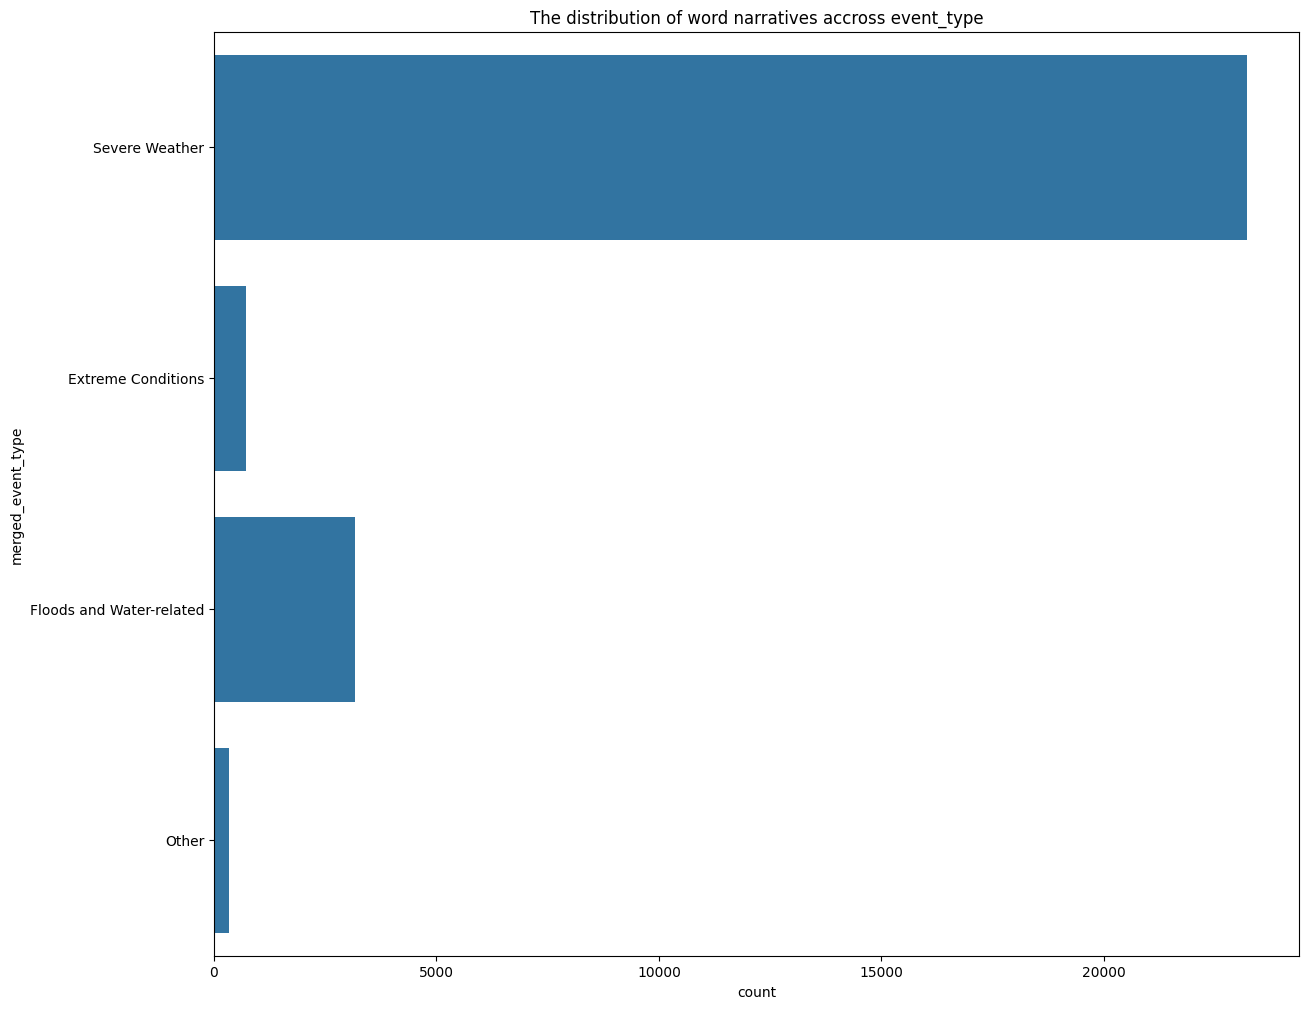

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sns.countplot(df.merged_event_type)
plt.title('The distribution of word narratives accross event_type')

from sklearn.preprocessing import LabelEncoder

# Extract the target variable
y = df['merged_event_type']
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(y)

# Add the encoded labels to the DataFrame
df['encoded_labels'] = encoded_labels
from collections import Counter
counter = Counter(df['encoded_labels'])
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

In [6]:
df['encoded_labels'][:10]

0     3
1     3
2     3
3     3
5     3
6     3
7     3
8     3
9     3
10    3
Name: encoded_labels, dtype: int64

encoded_labels
3    3180
1    3180
0     727
2     334
Name: count, dtype: int64


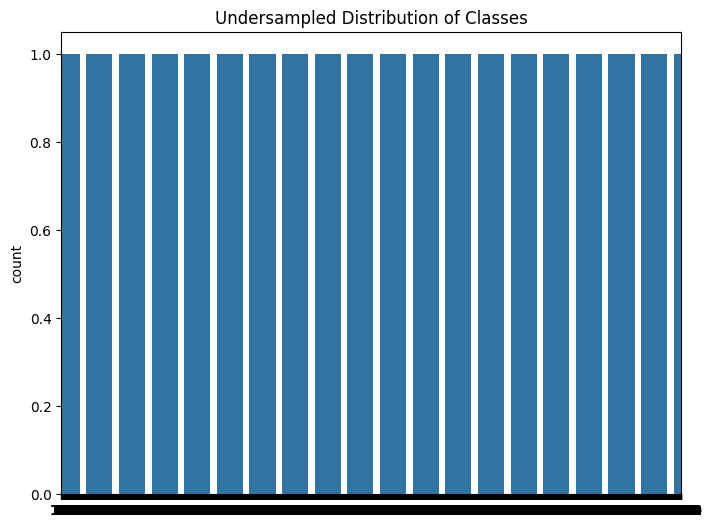

In [7]:
from sklearn.utils import shuffle
desired_samples_class3 = 3180  # Set the desired number of samples for Class 3

# Identify the indices of samples in Class 3
class3_indices = df[df['encoded_labels'] == 3].index

# Randomly sample to reduce the number of samples for Class 3
undersampled_indices_class3 = df.loc[class3_indices].sample(n=desired_samples_class3, random_state=42).index

# Identify the indices of samples in other classes
indices_other_classes = df[df['encoded_labels'] != 3].index
# Convert indices to Series
x1 = pd.Series(undersampled_indices_class3)
x2 = pd.Series(indices_other_classes)

# Concatenate the undersampled indices with indices from other classes
undersampled_indices = shuffle(pd.concat([x1, x2], ignore_index=True))

# Create the final undersampled DataFrame
df_undersampled = df.loc[undersampled_indices]

# Verify the new distribution
print(df_undersampled['encoded_labels'].value_counts())

# Plot the new distribution
plt.figure(figsize=(8, 6))
sns.countplot(df_undersampled['encoded_labels'])
plt.title('Undersampled Distribution of Classes')
plt.show()


In [8]:
df_undersampled

,event_narrative,event_type,merged_event_type,encoded_labels
7519,Wind Chill values dropped to 33 degrees below ...,Extreme Cold/Wind Chill,Extreme Conditions,0
22235,CBE reported reduced visibilities of one quart...,Dense Fog,Other,2
27660,Heat Indices of 110 degrees or greater.,Excessive Heat,Extreme Conditions,0
15141,The Household Water Supply Shortage Reporting ...,Drought,Extreme Conditions,0
30460,A WeatherFlow site measured a peak gust of 34 ...,Marine Thunderstorm Wind,Severe Weather,3
...,...,...,...,...
4328,A wind gust of 40 knots was measured at an aut...,Marine Thunderstorm Wind,Severe Weather,3
1147,Northwest winds reach sustained speeds of 40 m...,High Wind,Floods and Water-related,1
7744,Marine thunderstorm wind gust was measured at ...,Marine Thunderstorm Wind,Severe Weather,3
28311,These winds occurred 40 miles E of Beatty. The...,High Wind,Floods and Water-related,1


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming df_encoded is your DataFrame with the 'event_narrative' column
narratives = df_undersampled['event_narrative'].values

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(narratives)

# Calculate total_words
total_words = len(tokenizer.word_index) + 1  # Adding 1 for the out-of-vocabulary token

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(narratives)

# Calculate max_sequence_length
max_sequence_length = max(len(seq) for seq in sequences)

# Example of how to pad sequences for model input
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

print("Total Words:", total_words)
print("Max Sequence Length:", max_sequence_length)

Total Words: 10086
Max Sequence Length: 859


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['event_narrative'], df['encoded_labels'], test_size=0.2, random_state=434)

In [11]:
print(x_train, y_train)

2643           Several trees uprooted along Alliance Road.
4780     Several sources of weather observations indica...
12490    Scattered roadways across the county still had...
14757    Quarter size hail was reported along Highway 3...
8424     Several sources from local spotters, and offic...
                               ...                        
29947    The Household Water Supply Shortage Reporting ...
7439         Around 3 inches of snow fell across the area.
34222    Coop observer reported heavy rainfall of 2.49 ...
7246     Trees and power lines were blown down along Ra...
2248     Heavy rainfall over southern sections of Alexa...
Name: event_narrative, Length: 21968, dtype: object 2643     3
4780     0
12490    1
14757    3
8424     3
        ..
29947    0
7439     3
34222    3
7246     3
2248     3
Name: encoded_labels, Length: 21968, dtype: int64


In [14]:
import numpy as np

# Download GloVe embeddings (you can adjust the embedding dimension and file path)
embedding_dim = 100
embedding_file_path = 'glove.6B.100d.txt'  # Replace with the actual path

# Load GloVe embeddings into a dictionary
embedding_index = {}
with open(embedding_file_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Create an embedding matrix
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
# Convert text to sequences
x_train_sequences = tokenizer.texts_to_sequences(x_train)
x_test_sequences = tokenizer.texts_to_sequences(x_test)
# Pad sequences
max_len = max_sequence_length  # Set the maximum sequence length
x_train_padded = pad_sequences(x_train_sequences, maxlen=max_len, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test_sequences, maxlen=max_len, padding='post', truncating='post')

In [15]:
# Define the LSTM model with GloVe embeddings
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, 
                              input_length=max_len, weights=[embedding_matrix], trainable=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(47, activation='softmax') 
])

# Print the model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 859, 100)          1664700   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 47)                3055      
                                                                 
Total params: 1709995 (6.52 MB)
Trainable params: 1709995 (6.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Convert the labels to numpy array
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
y_train_np = np.array(y_train)

# Define the number of folds
num_folds = 5

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []



# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_text_classifier_model_glove_aug.h5', save_best_only=True)

# Iterate over folds
for train_index, val_index in kf.split(x_train_padded, y_train_np):
    x_train_fold, x_val_fold = x_train_padded[train_index], x_train_padded[val_index]
    y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]
    model = model    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold),
                        callbacks=[early_stopping,model_checkpoint])

    # Evaluate the model on the validation set and store accuracies
    _, train_accuracy = model.evaluate(x_train_fold, y_train_fold)
    _, val_accuracy = model.evaluate(x_val_fold, y_val_fold)

    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

# Print average training and validation accuracies
print(f'Average Training Accuracy: {np.mean(train_accuracies)}')
print(f'Average Validation Accuracy: {np.mean(val_accuracies)}')

Epoch 1/10
550/550 [==============================] - 262s 474ms/step - loss: 0.6391 - accuracy: 0.8448 - val_loss: 0.5442 - val_accuracy: 0.8464
Epoch 2/10


/dev1/genomeGPT/anaconda3/envs/optinum/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


550/550 [==============================] - 260s 473ms/step - loss: 0.5420 - accuracy: 0.8464 - val_loss: 0.5400 - val_accuracy: 0.8464
Epoch 3/10
550/550 [==============================] - 262s 476ms/step - loss: 0.5424 - accuracy: 0.8464 - val_loss: 0.5409 - val_accuracy: 0.8464
Epoch 4/10
550/550 [==============================] - 263s 479ms/step - loss: 0.5421 - accuracy: 0.8464 - val_loss: 0.5404 - val_accuracy: 0.8464
Epoch 5/10
138/138 [==============================] - 19s 139ms/step - loss: 0.5400 - accuracy: 0.8464
Epoch 1/10
550/550 [==============================] - 257s 465ms/step - loss: 0.5423 - accuracy: 0.8464 - val_loss: 0.5440 - val_accuracy: 0.8464
Epoch 2/10
550/550 [==============================] - 251s 456ms/step - loss: 0.5424 - accuracy: 0.8464 - val_loss: 0.5442 - val_accuracy: 0.8464
Epoch 3/10
550/550 [==============================] - 257s 468ms/step - loss: 0.5417 - accuracy: 0.8464 - val_loss: 0.5388 - val_accuracy: 0.8464
Epoch 4/10
321/550 [============

KeyboardInterrupt: 

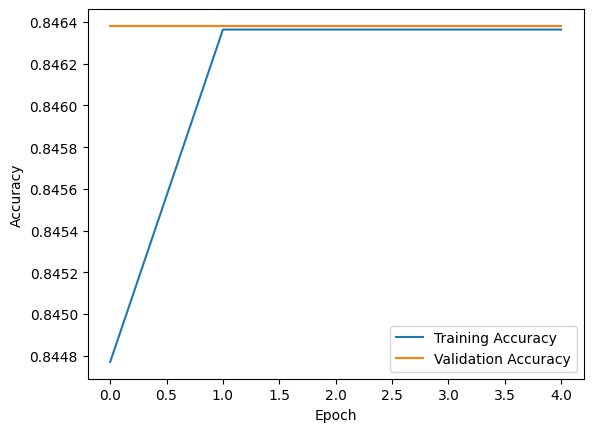

In [17]:
# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()